In [1]:
import sys
import os
from mpasanalysis import *
%matplotlib inline

In [2]:
def plot_hlines(yfrac, axis=None, **kwargs):
    if axis is None:
        axis = plt.gca()
    ymin, ymax = axis.get_ylim()
    yf = ymin+yfrac*(ymax-ymin)
    plt.axhline(yf, **kwargs)
def plot_vlines(xfrac, axis=None, **kwargs):
    if axis is None:
        axis = plt.gca()
    xmin, xmax = axis.get_xlim()
    xf = xmin+xfrac*(xmax-xmin)
    plt.axvline(xf, **kwargs)
def plot_snapshot(varname, tidx, zidx=0, name=None, units=None,
                  position='cell', levels=None, xfrac=None, yfrac=None, **kwargs):
    data = mpas_data.get_domain(varname=varname, position=position, name=name, units=units, tidx=tidx)
    # xy view
    fig_xy = plt.figure(figsize=[12,10])
    data.plot_xy(ptype='contourf', levels=levels, zidx=zidx, **kwargs)
    axis = plt.gca()
    if xfrac is not None:
        plot_vlines(xfrac, axis=axis, color='k')
    if yfrac is not None:
        plot_hlines(yfrac, axis=axis, color='k')
    
    # cross front
    if xfrac is not None:
        plt.figure(figsize=[12,6])
        data.plot_yz(xfrac=xfrac, ptype='contourf', levels=levels, **kwargs)
#         plt.ylim([-80,0])
    else:
        plt.figure(figsize=[12,6])
        data.plot_yz_mean(ptype='contourf', levels=levels, **kwargs)
#         plt.ylim([-80,0])
    # along front
    if yfrac is not None:
        plt.figure(figsize=[12,6])
        data.plot_xz(yfrac=yfrac, ptype='contourf', levels=levels, **kwargs)
#         plt.ylim([-80,0])
    else:
        plt.figure(figsize=[12,6])
        data.plot_xz_mean(ptype='contourf', levels=levels, **kwargs)
#         plt.ylim([-80,0])
        
    

In [3]:
casename = 'sp_warm_filament'
mesh_file = os.environ['HOME']+'/scratch/superparameterization/'+casename+'_init/ocean.nc'
data_file = mesh_file
mpas_data = MPASOData(filepath=data_file, filepath_mesh=mesh_file)

## Initial condition

### Temperature 

In [4]:
data = mpas_data.get_domain(varname='temperature', position='cell', name='temperature', units='degC', tidx=0)
print('Max: {:6.2f}'.format(data.data.max()))
print('Min: {:6.2f}'.format(data.data.min()))

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_warm_filament_init/ocean.nc
Max:  16.15
Min:  15.56


Reading mesh data from /Users/qingli/scratch/superparameterization/sp_warm_filament_init/ocean.nc
Average over x at 111 bins in y.
Average over y at 129 bins in x.


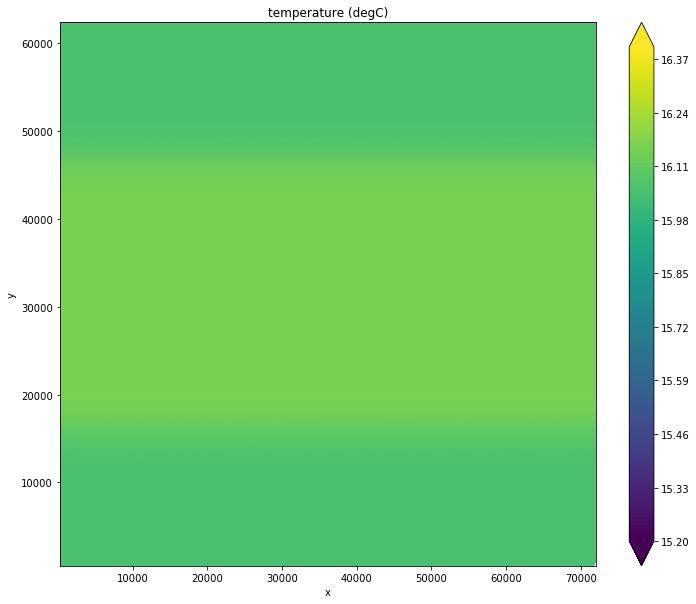

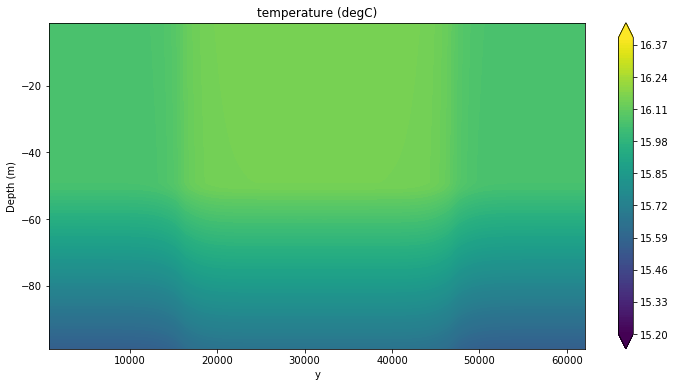

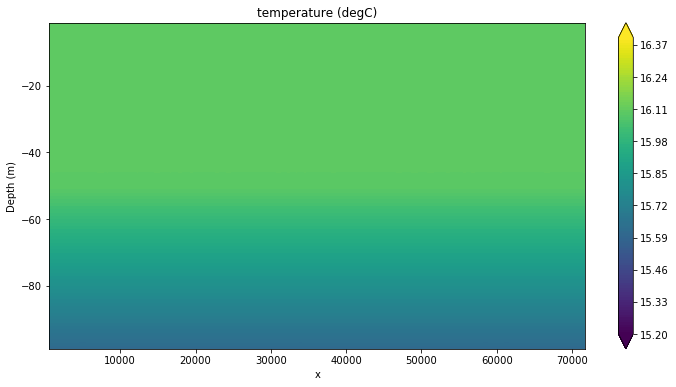

In [5]:
levels=np.linspace(15.2,16.4,121)
plot_snapshot(varname='temperature', position='cell', name='temperature', units='degC',
              levels=levels, tidx=0)

### Salinity

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_warm_filament_init/ocean.nc
Average over x at 111 bins in y.
Average over y at 129 bins in x.


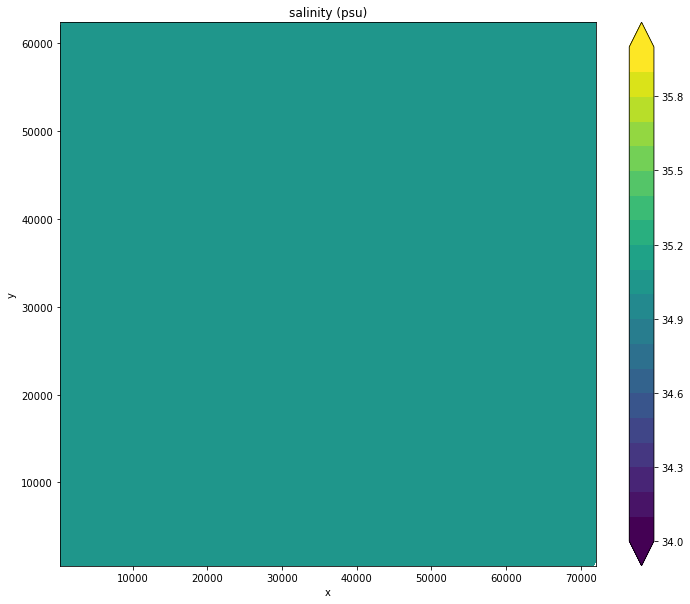

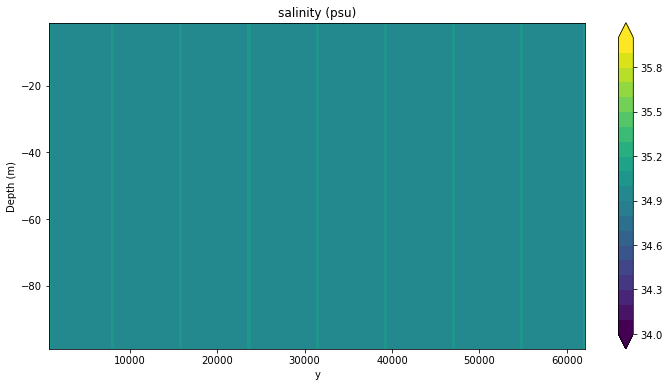

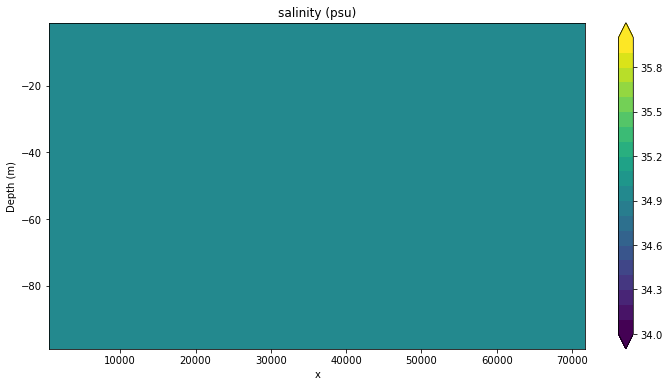

In [6]:
levels=np.linspace(34,36,21)
plot_snapshot(varname='salinity', position='cell', name='salinity', units='psu',
              levels=levels, tidx=0)